In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path=r'C:\Users\vamsh\Documents\DataFiles\DataSet\visadataset.csv'
visa_df=pd.read_csv(file_path)

In [7]:
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [9]:
visa_df[['continent','case_status']]

,continent,case_status
0,Asia,Denied
1,Asia,Certified
2,Asia,Denied
3,Asia,Denied
4,Africa,Certified
...,...,...
25475,Asia,Certified
25476,Asia,Certified
25477,Asia,Certified
25478,Asia,Certified


In [11]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [13]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**How many members are certified from Asia**

In [23]:
visa_df['continent']=='Asia'

0         True
1         True
2         True
3         True
4        False
         ...  
25475     True
25476     True
25477     True
25478     True
25479     True
Name: continent, Length: 25480, dtype: bool

In [61]:
visa_df['case_status']=='Certified'

0        False
1         True
2        False
3        False
4         True
         ...  
25475     True
25476     True
25477     True
25478     True
25479     True
Name: case_status, Length: 25480, dtype: bool

In [63]:
con=con1&con2
con

0        False
1         True
2        False
3        False
4        False
         ...  
25475     True
25476     True
25477     True
25478     True
25479     True
Length: 25480, dtype: bool

In [65]:
len(visa_df[con])

11012

In [59]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
cert_con=con1&con2
len(visa_df[cert_con])

11012

**How many members are denied from Asia**

In [67]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Denied'
deni_con=con1&con2
len(visa_df[deni_con])

5849

**Length of certified and denied members length**

In [69]:
len(visa_df[cert_con]),len(visa_df[deni_con])

(11012, 5849)

In [81]:
labels=visa_df['continent'].unique()
certified,denied=[],[]
for i in labels:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    certi_con=con1&con2
    deni_con=con1&con3
    certified.append(len(visa_df[certi_con]))
    denied.append(len(visa_df[deni_con]))

In [88]:
pd.DataFrame(zip(certified,denied),
             index=labels,
             columns=visa_df['case_status'].unique())

,Denied,Certified
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


- If we dont sort Certified is becoming Denied and Denied is becoming Certified

In [83]:
case_labels=sorted(visa_df['case_status'].unique())

In [90]:
pd.DataFrame(zip(certified,denied),
             index=labels,
             columns=case_labels)

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**crosstab-method**

In [97]:
id_col=visa_df['continent']
col=visa_df['case_status']
r1=pd.crosstab(id_col,col)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

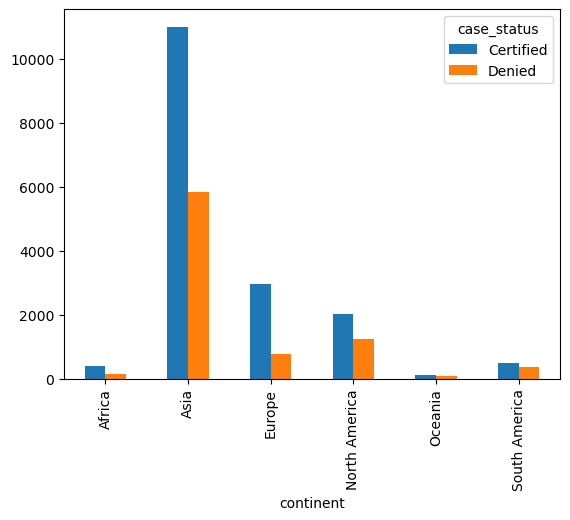

In [99]:
r1.plot(kind='bar')

<Axes: xlabel='continent', ylabel='count'>

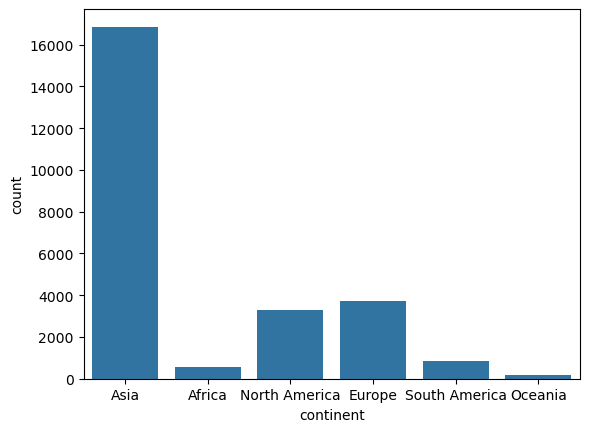

In [105]:
sns.countplot(data=visa_df,
              x='continent')

<Axes: xlabel='continent', ylabel='count'>

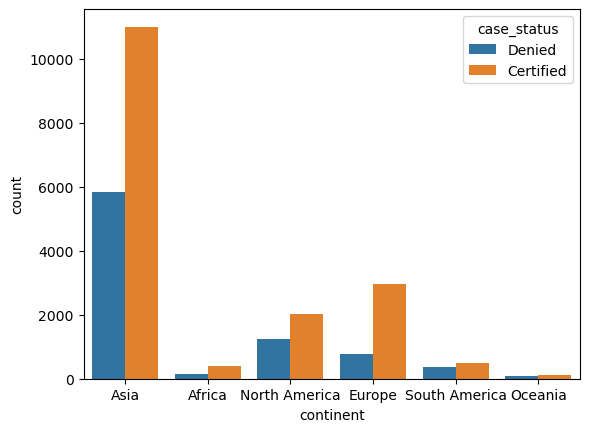

In [103]:
sns.countplot(data=visa_df,
              x='continent',
             hue='case_status')

<Axes: xlabel='continent', ylabel='count'>

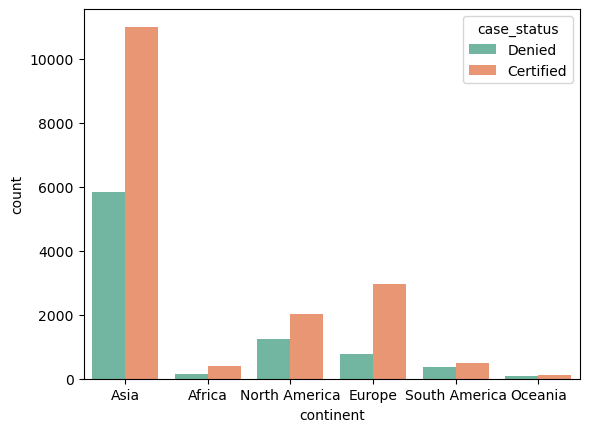

In [107]:
sns.countplot(data=visa_df,
              x='continent',
             hue='case_status',
             palette='Set2',
             width=0.8)

In [ ]:
id_col=visa_df['continent']
col=visa_df['case_status']
r1=pd.crosstab(id_col,col)
r1

In [9]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
id_col=col1
cols=[col2,col3]
pd.crosstab(col1,cols)

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

In [31]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
id_col=col1
cols=[col2,col3]
r1=pd.crosstab(col1,cols)

<Axes: xlabel='continent'>

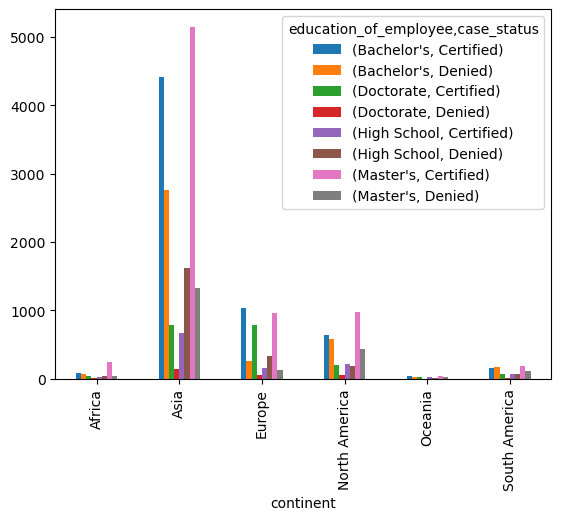

In [33]:
r1.plot(kind='bar')

In [17]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
id_col=col2
cols=[col1,col3]
pd.crosstab(id_col,cols)

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

In [27]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
id_col=col2
cols=[col1,col3]
r2=pd.crosstab(id_col,cols)

<Axes: xlabel='education_of_employee'>

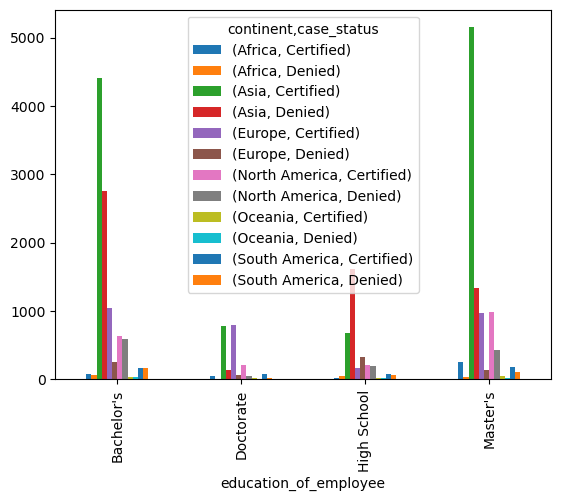

In [19]:
r2.plot(kind='bar')

In [13]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
id_col=col3
cols=[col1,col2]
pd.crosstab(col3,cols)

continent                 Africa                                      Asia  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
case_status                                                                  
Certified                     81        43          23      250       4407   
Denied                        62        11          43       38       2761   

continent                                                Europe            \
education_of_employee Doctorate High School Master's Bachelor's Doctorate   
case_status                                                                 
Certified                   780         676     5149       1040       788   
Denied                      143        1614     1331        259        58   

continent              ... North America             Oceania            \
education_of_employee  ...   High School Master's Bachelor's Doctorate   
case_status            ...                                               
Certified              ...           210      979         38        19   
Denied                 ...           191      429         28         3   

continent                                  South America            \
education_of_employee High School Master's    Bachelor's Doctorate   
case_status                                                          
Certified                      19       46           160        75   
Denied                         17       22           173        14   

continent                                   
education_of_employee High School Master's  
case_status                                 
Certified                      74      184  
Denied                         63      109  

[2 rows x 24 columns]

In [23]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
id_col=col3
cols=[col1,col2]
r3=pd.crosstab(col3,cols)


<Axes: xlabel='case_status'>

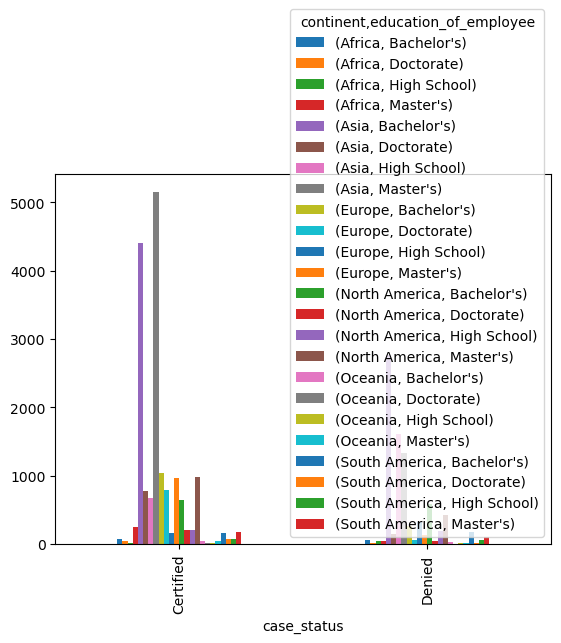

In [25]:
r3.plot(kind='bar')

**Scatter Plot**

- bar chart: Frequency table
- pie chart: relative frequency table
- histogram: frequency distribution plot
- box plot: Outlier analysis
- scatter plot: Relation between two numerical columns

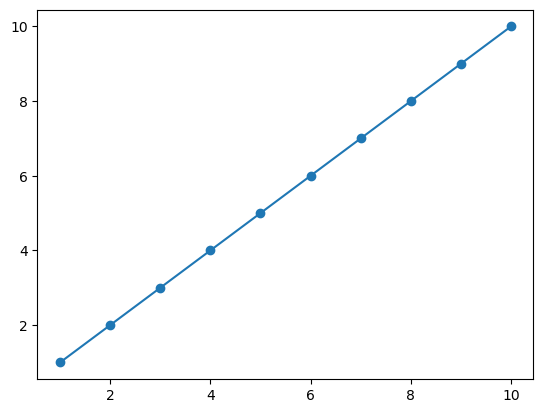

In [35]:
x=list(range(1,11))
y=list(range(1,11))
plt.scatter(x,y)
plt.plot(x,y)

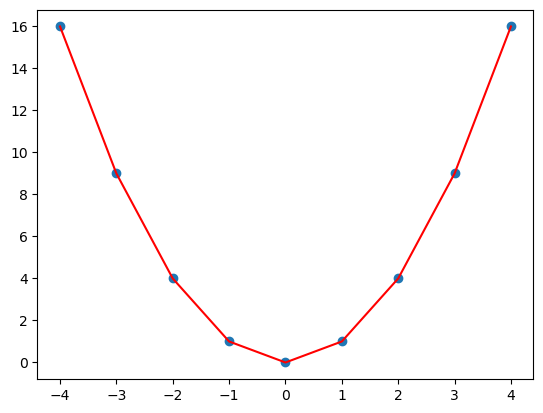

In [51]:
x=list(range(-4,5))
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y,color='red')

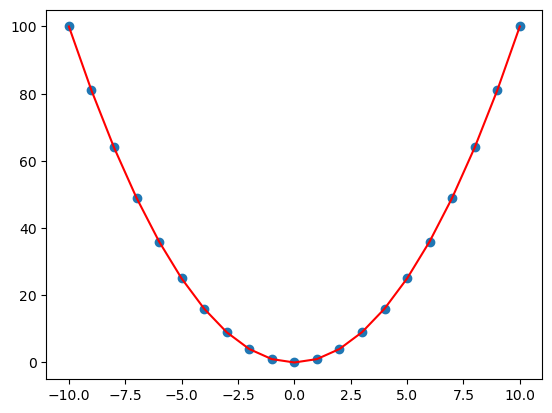

In [53]:
x=list(range(-10,11))
y=[i**2 for i in x]
plt.scatter(x,y)
plt.plot(x,y,color='red')

Text(0.5, 1.0, 'no_of_employees and yr_of_estab')

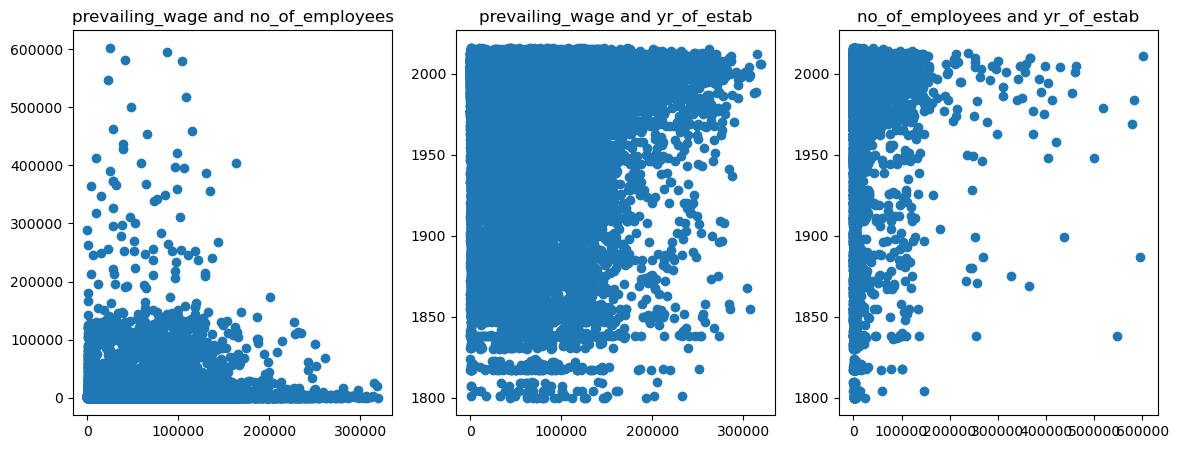

In [67]:
col1=visa_df['prevailing_wage']
col2=visa_df['no_of_employees']
col3=visa_df['yr_of_estab']
plt.figure(figsize=(14,5))
plt.subplot(1,3,1).scatter(col1,col2)
plt.title('prevailing_wage and no_of_employees')
plt.subplot(1,3,2).scatter(col1,col3)
plt.title('prevailing_wage and yr_of_estab')
plt.subplot(1,3,3).scatter(col2,col3)
plt.title('no_of_employees and yr_of_estab')

**Correlation**

In [70]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heatmap**

<Axes: >

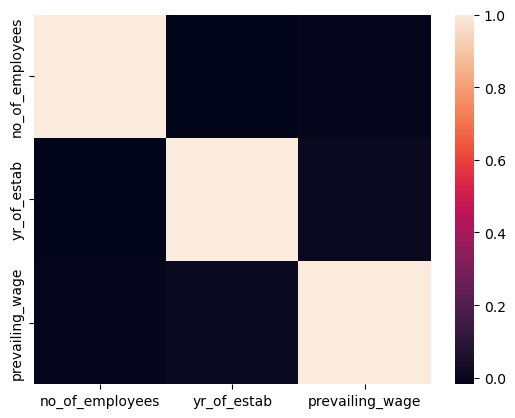

In [75]:
corr=visa_df.corr(numeric_only=True)
sns.heatmap(corr)

<Axes: >

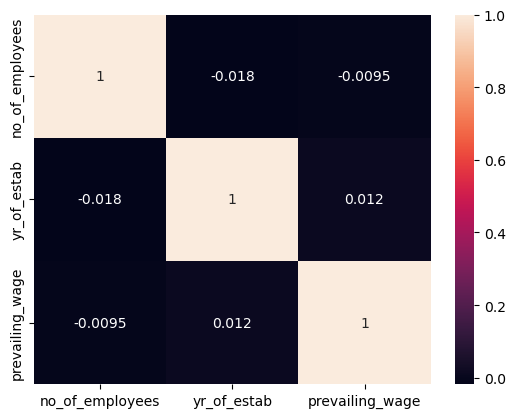

In [77]:
corr=visa_df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

In [ ]:
#step-1:Wine quality dataset

In [87]:
file_path=r'C:\Users\vamsh\Documents\DataFiles\DataSet\winequality_red.csv'
wine_df=pd.read_csv(file_path)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#step-2: apply correlation:12*12=144 values

In [85]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
#step-3: By seeing this 144 human eyes 

<Axes: >

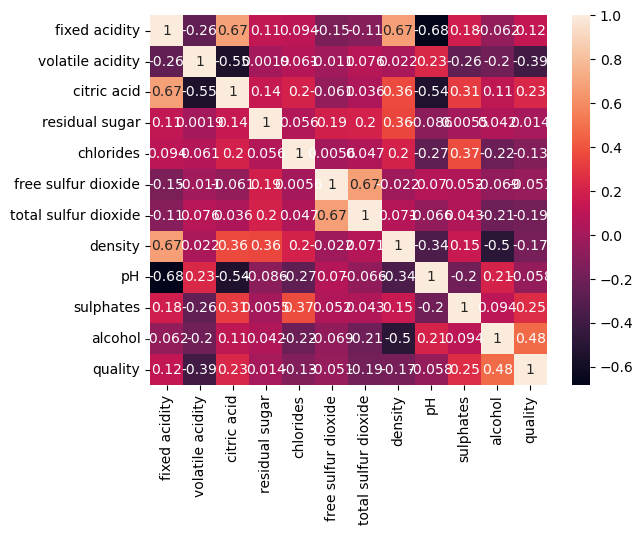

In [101]:
corr=wine_df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
fixed acidity has 67% positive relation with citiric acid and 68% negtive ph
no relation with alcohol

Text(0.5, 1.0, 'fixed acidity and alcohol')

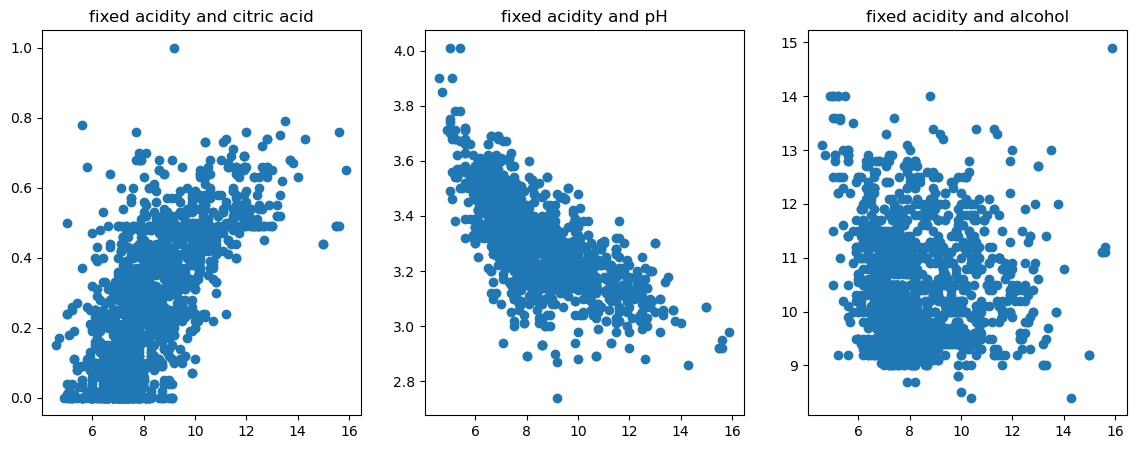

In [99]:
col1=wine_df['fixed acidity']
col2=wine_df['citric acid']
col3=wine_df['pH']
col4=wine_df['alcohol']
plt.figure(figsize=(14,5))
plt.subplot(1,3,1).scatter(col1,col2)
plt.title('fixed acidity and citric acid')
plt.subplot(1,3,2).scatter(col1,col3)
plt.title('fixed acidity and pH')
plt.subplot(1,3,3).scatter(col1,col4)
plt.title('fixed acidity and alcohol')